In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import pandas as pd

from BSE import market_session

%reload_ext autoreload
%autoreload 2

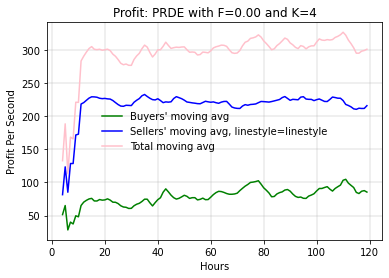

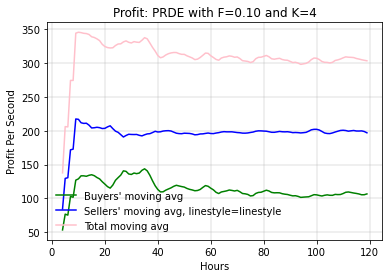

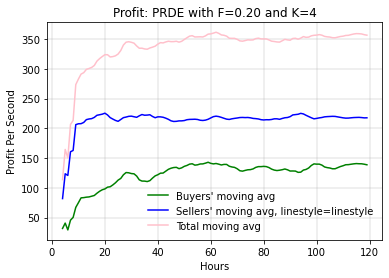

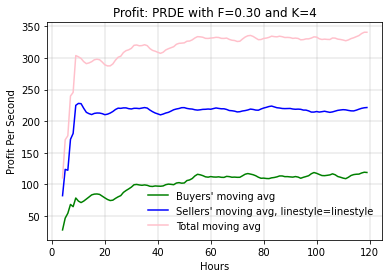

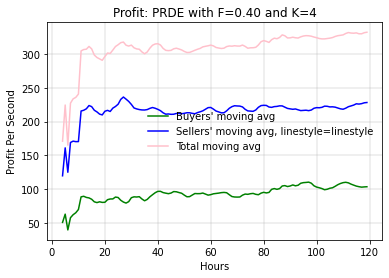

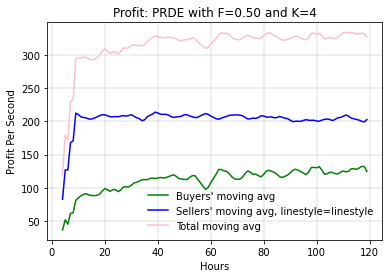

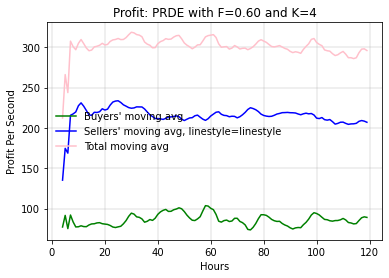

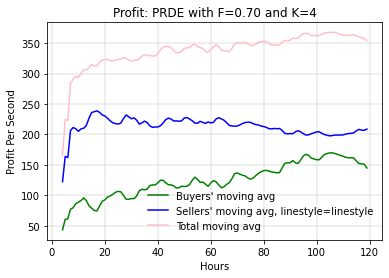

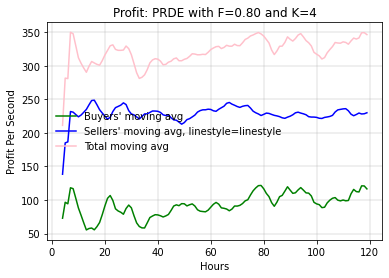

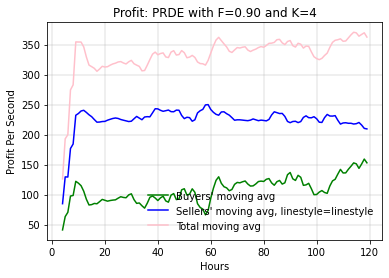

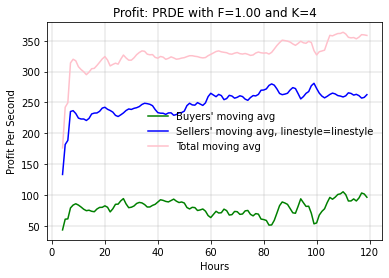

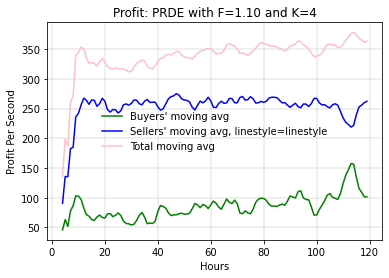

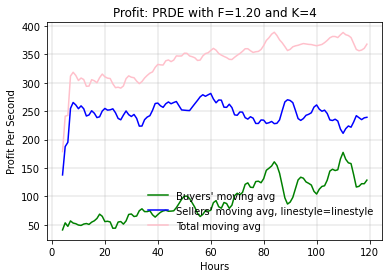

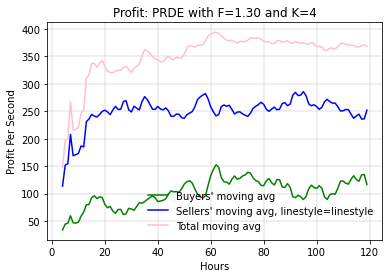

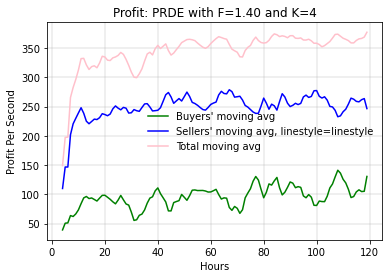

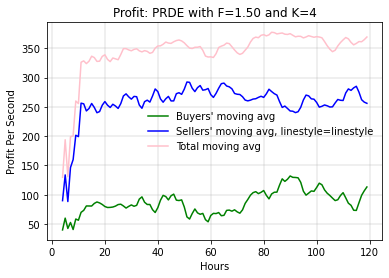

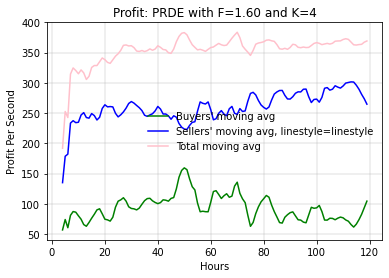

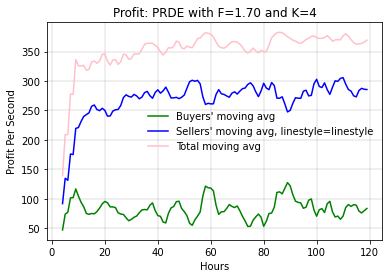

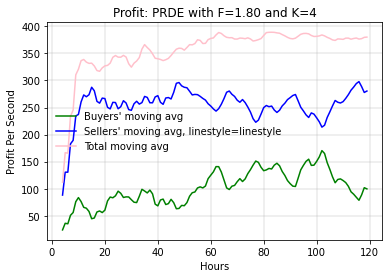

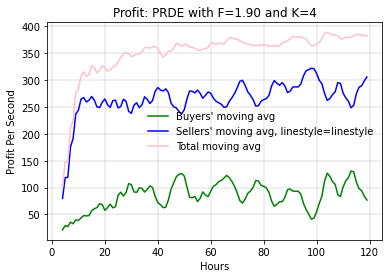

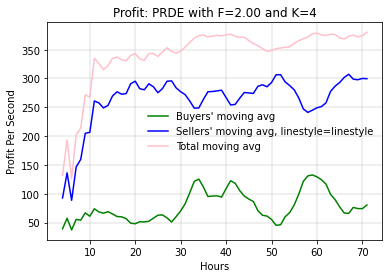

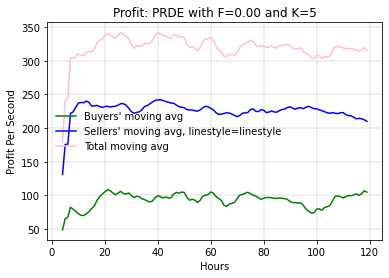

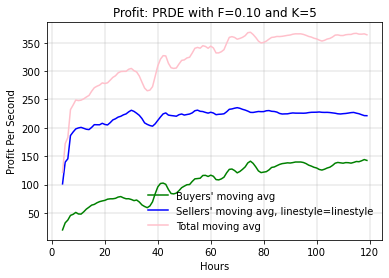

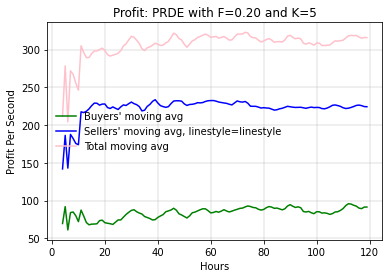

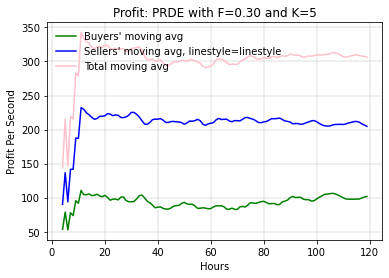

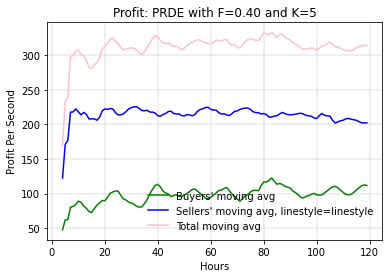

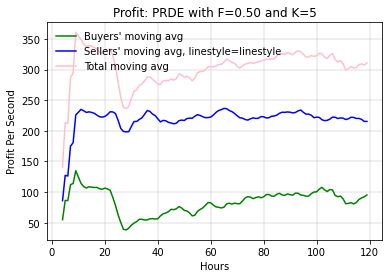

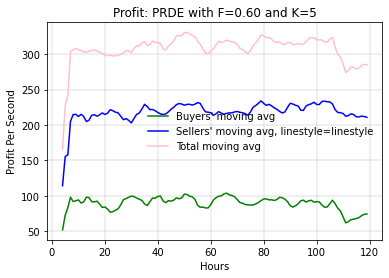

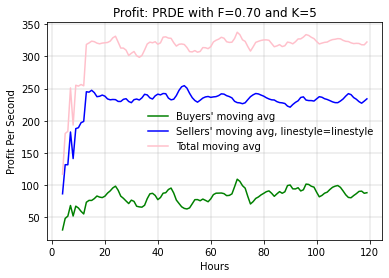

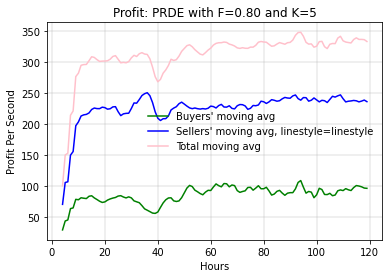

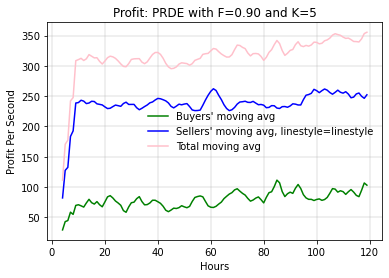

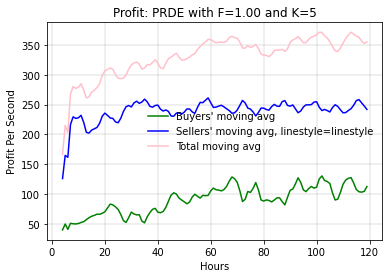

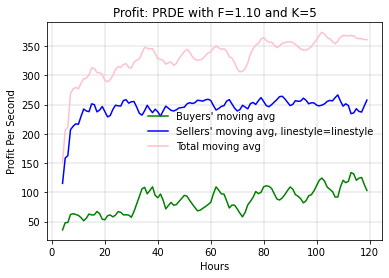

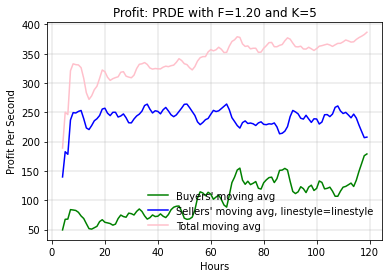

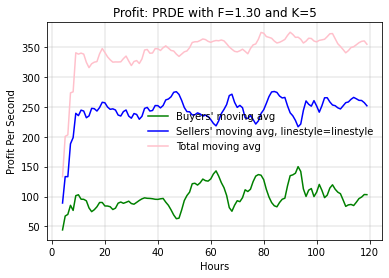

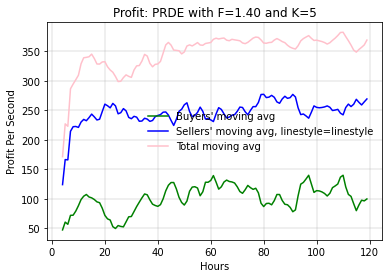

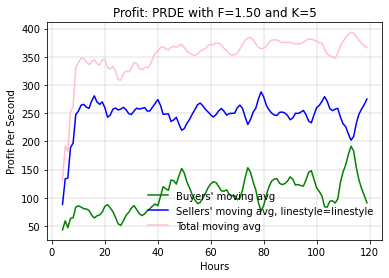

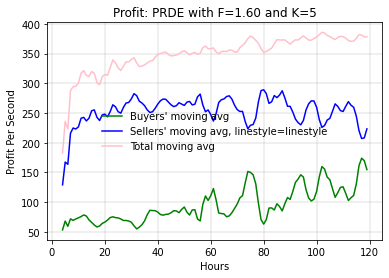

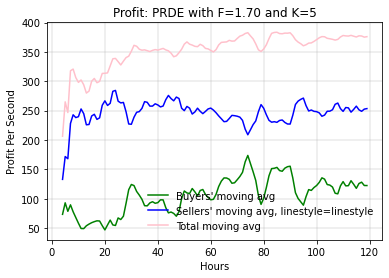

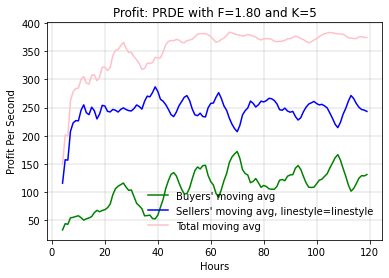

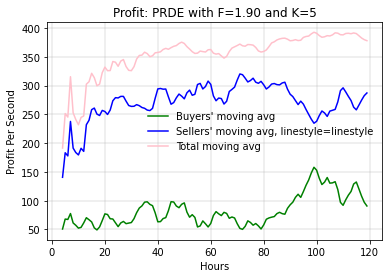

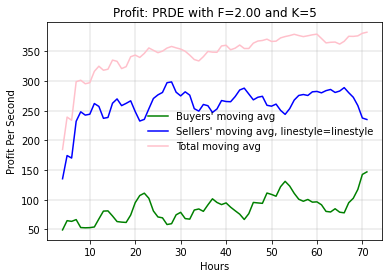

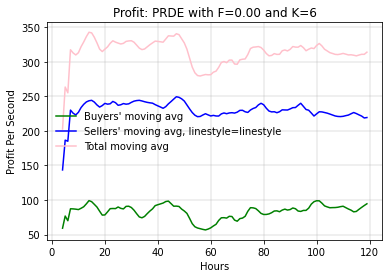

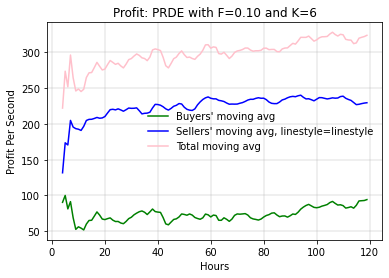

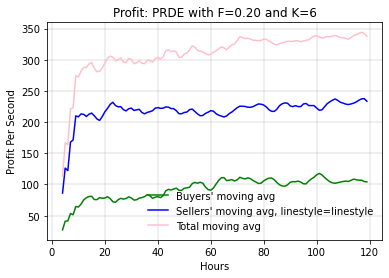

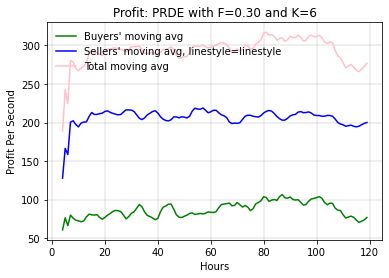

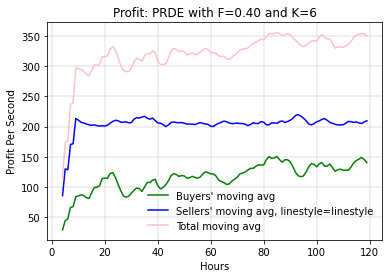

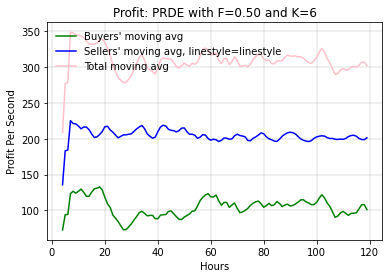

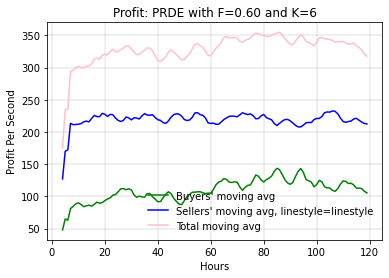

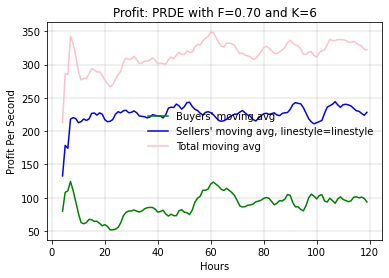

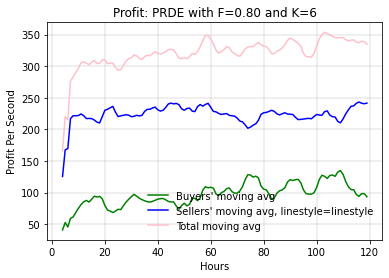

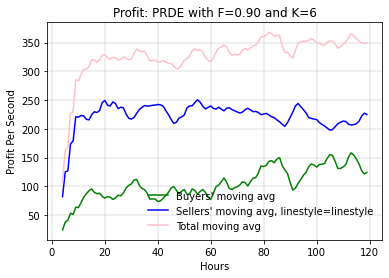

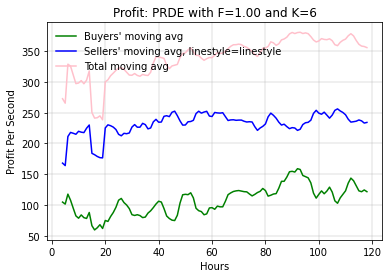

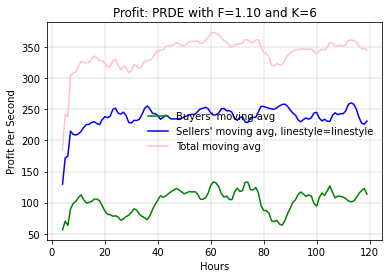

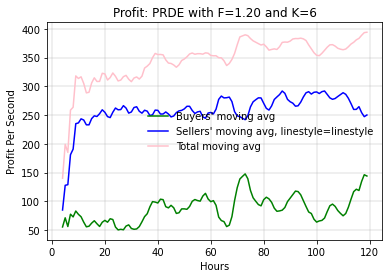

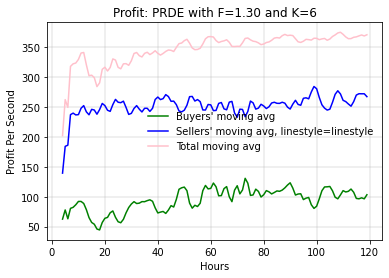

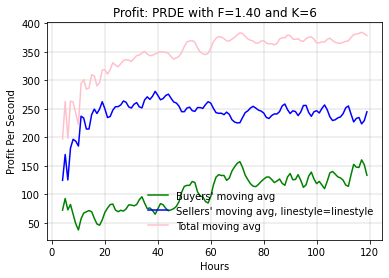

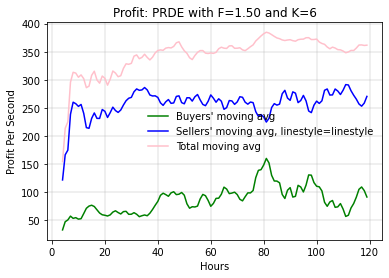

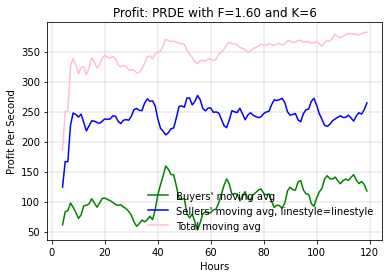

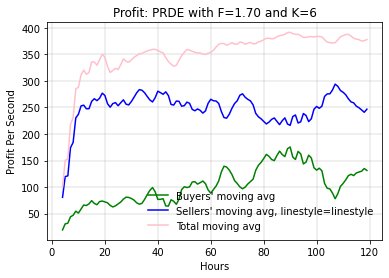

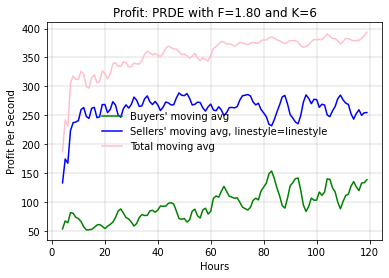

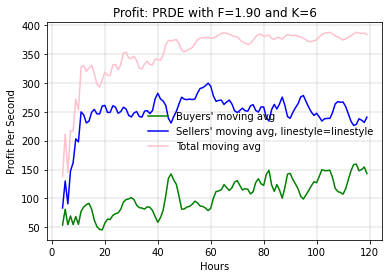

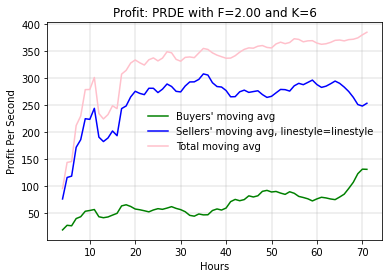

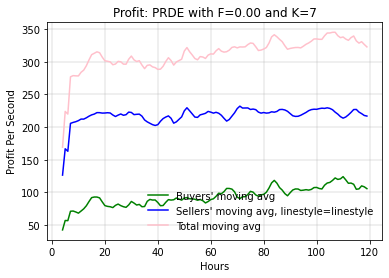

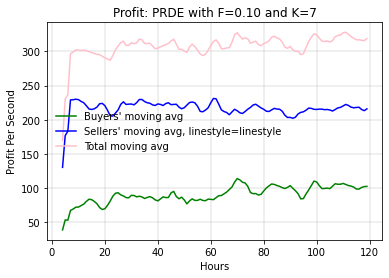

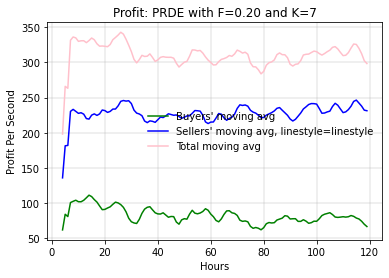

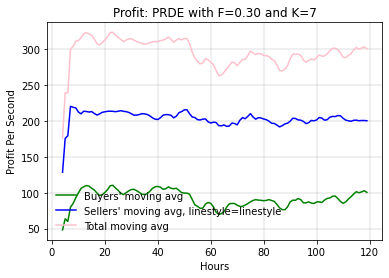

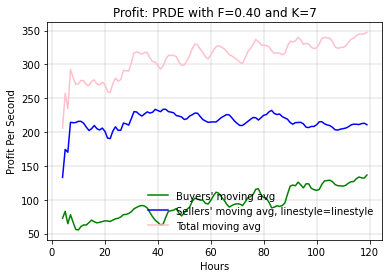

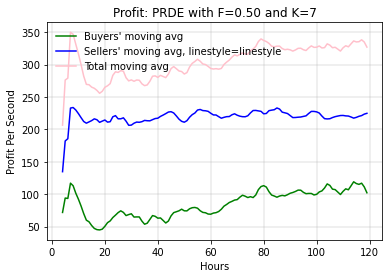

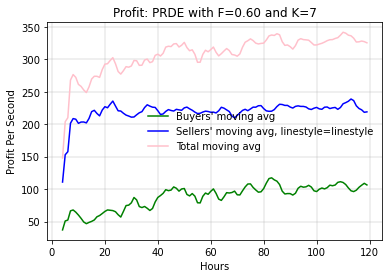

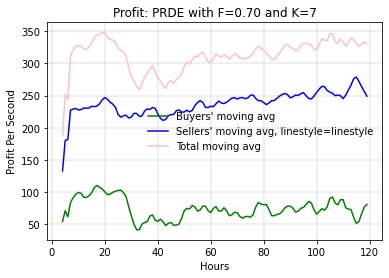

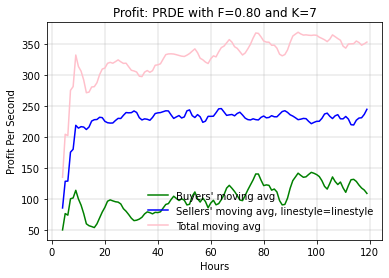

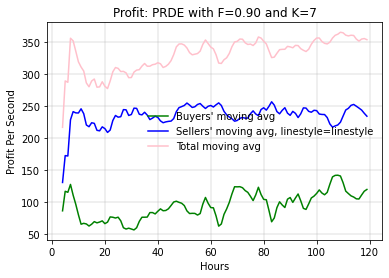

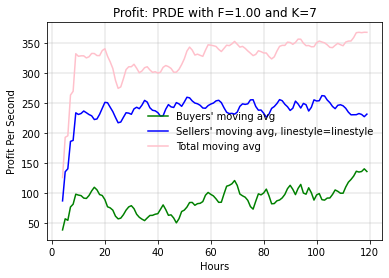

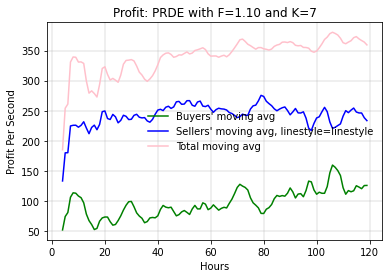

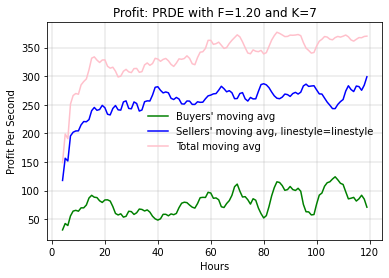

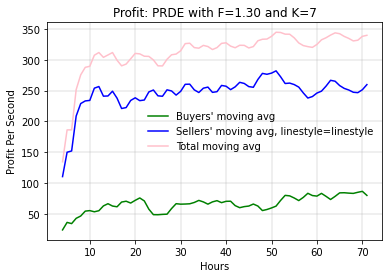

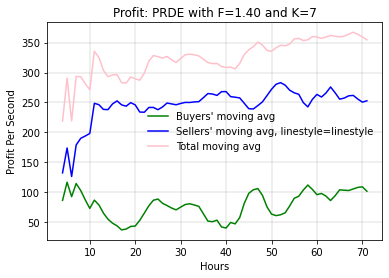

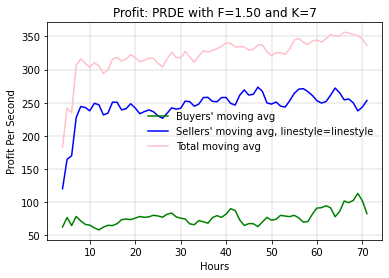

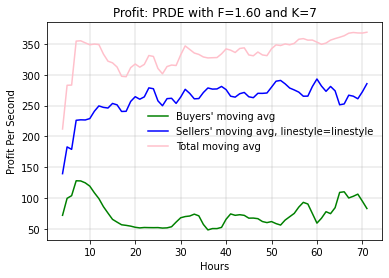

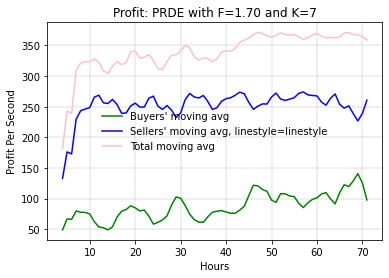

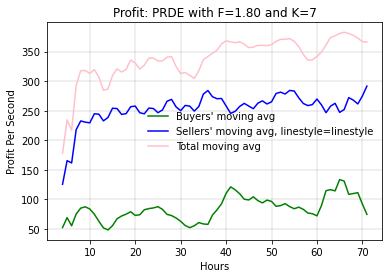

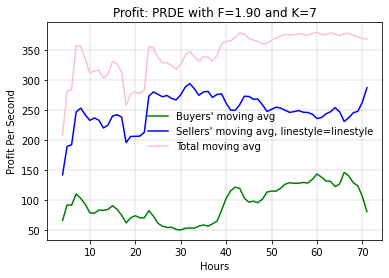

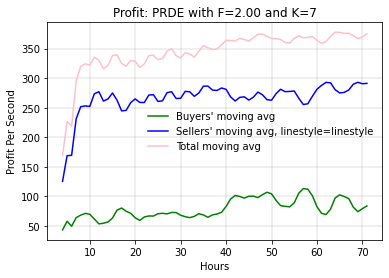

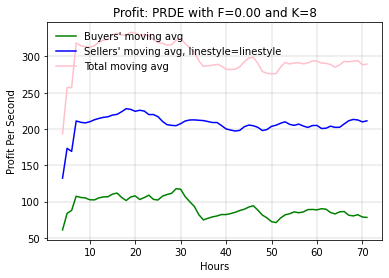

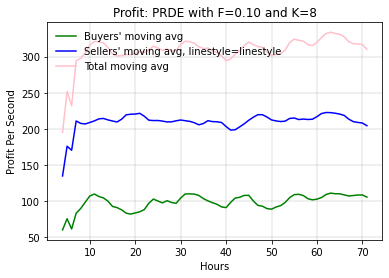

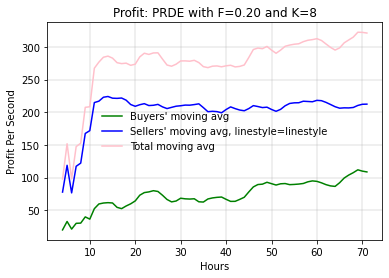

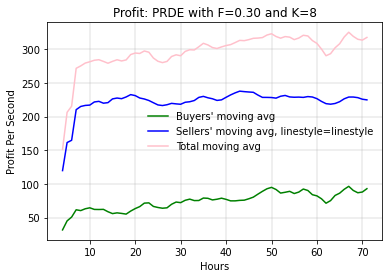

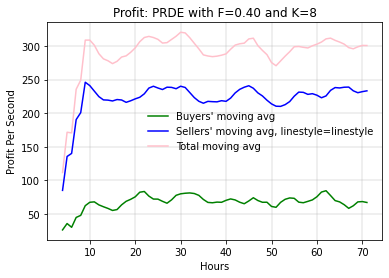

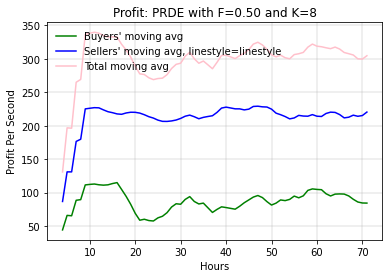

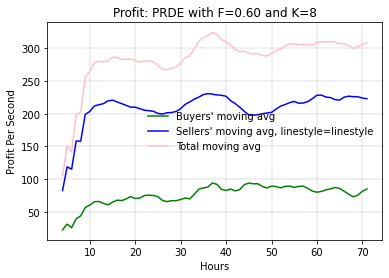

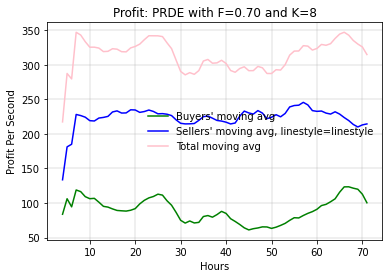

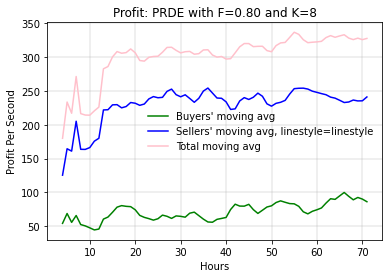

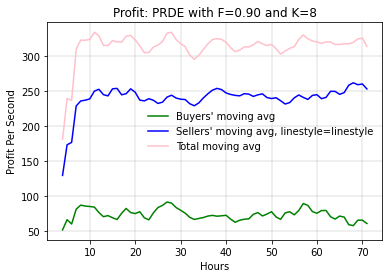

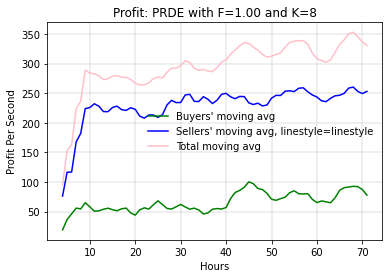

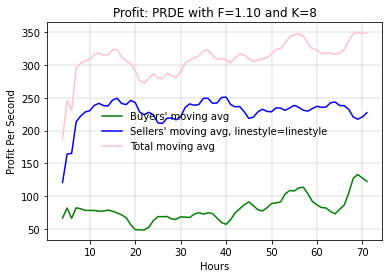

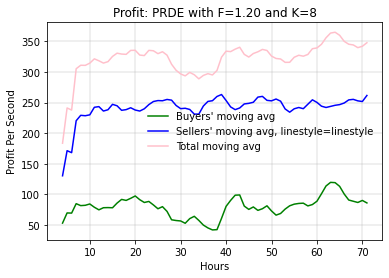

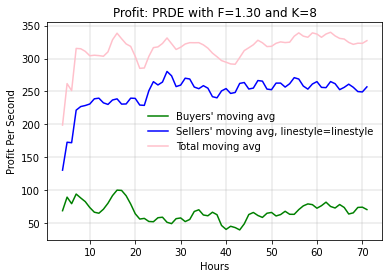

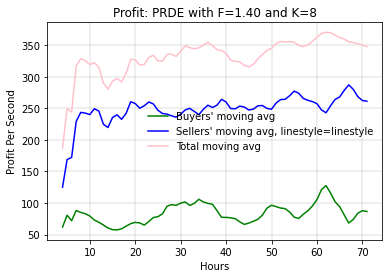

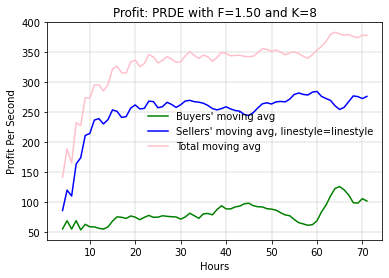

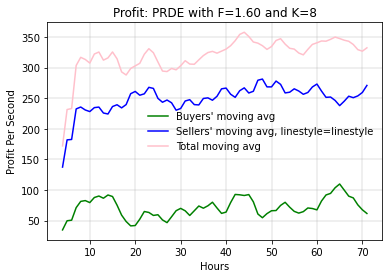

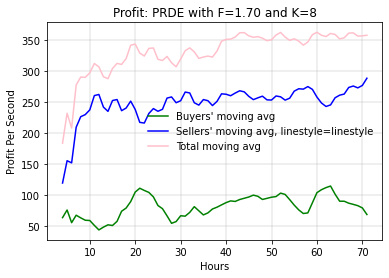

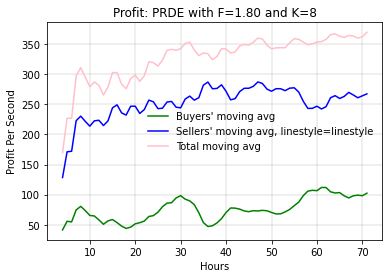

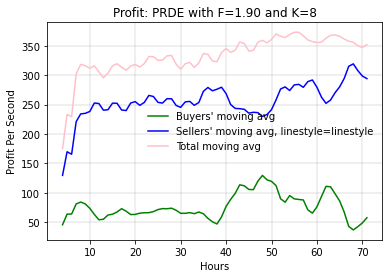

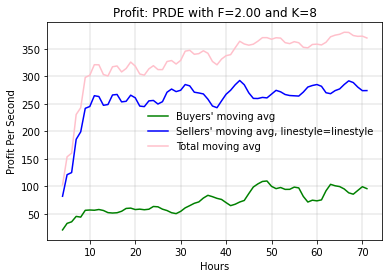

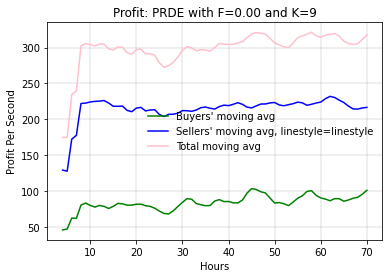

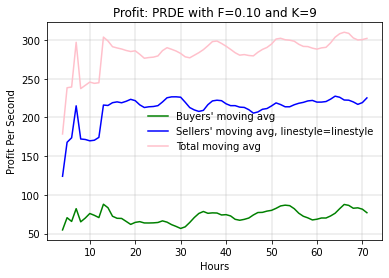

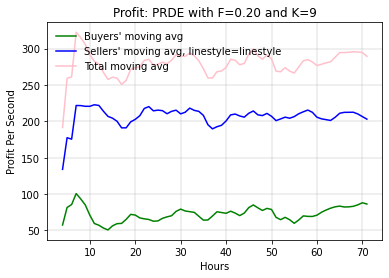

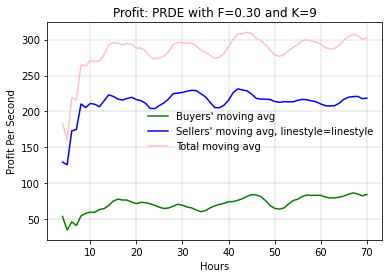

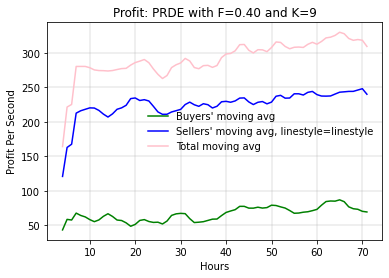

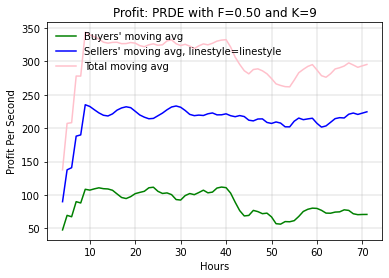

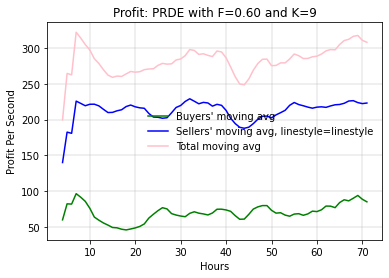

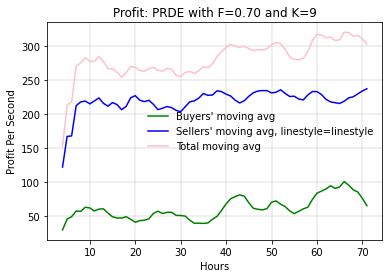

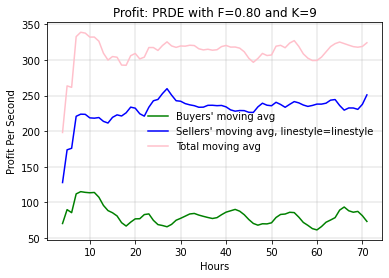

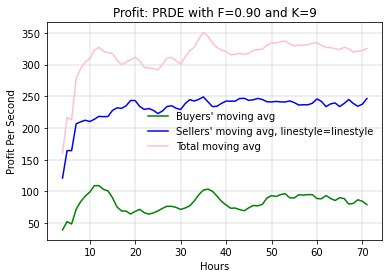

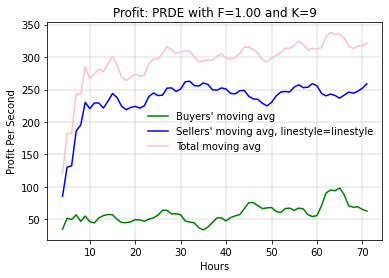

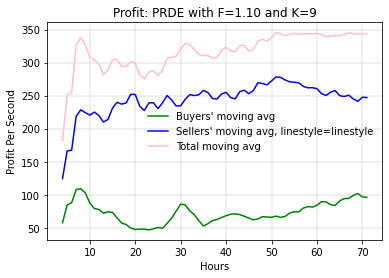

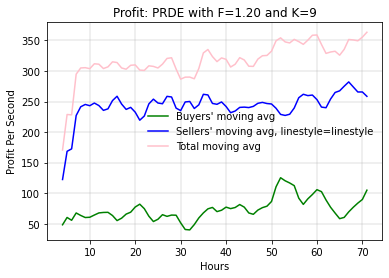

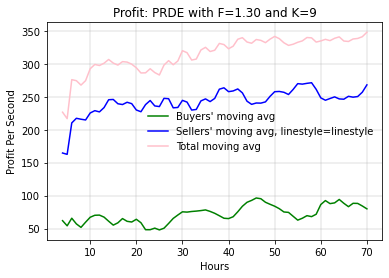

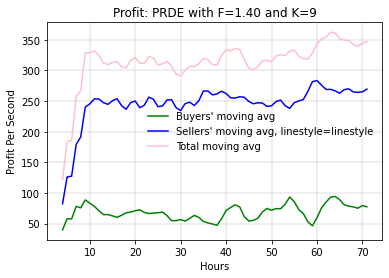

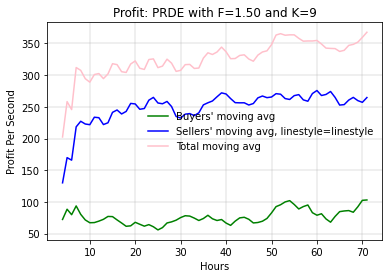

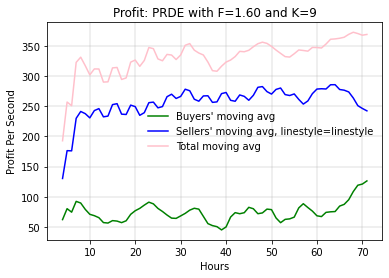

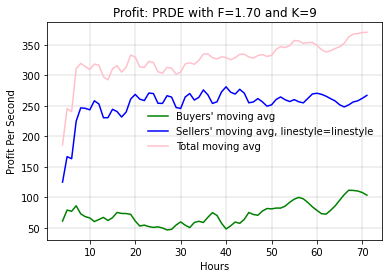

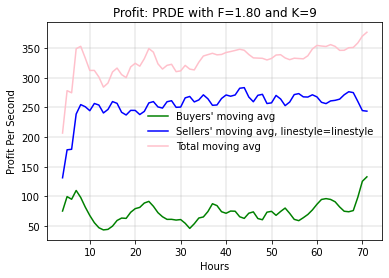

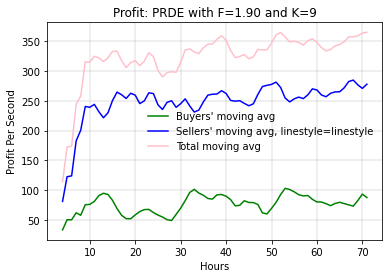

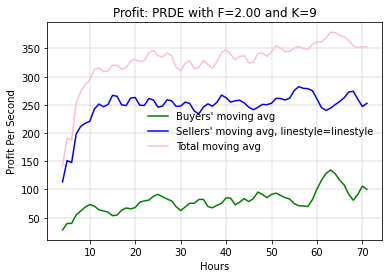

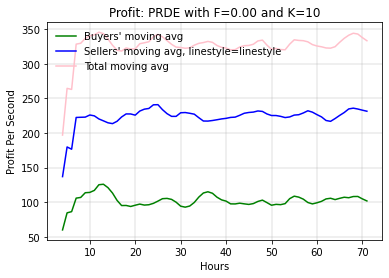

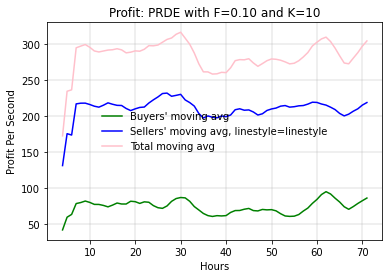

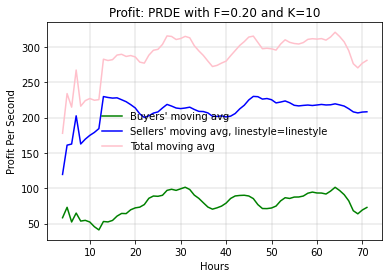

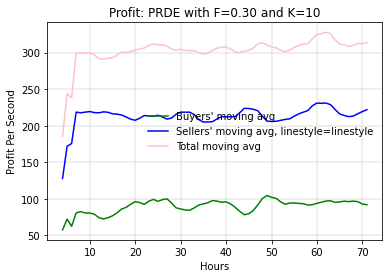

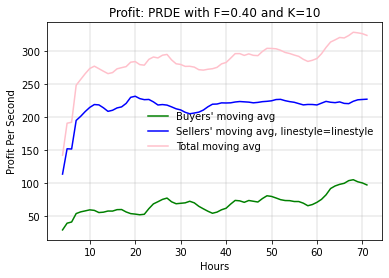

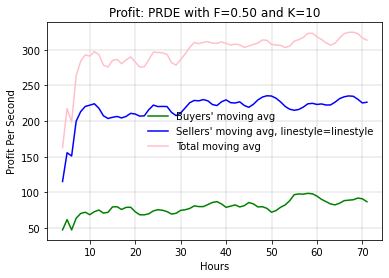

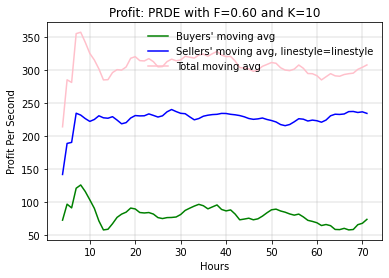

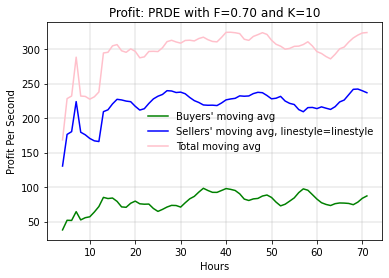

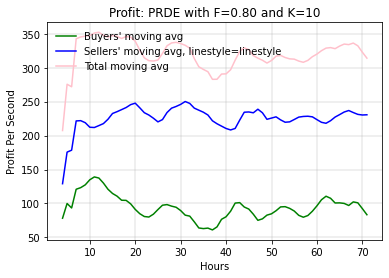

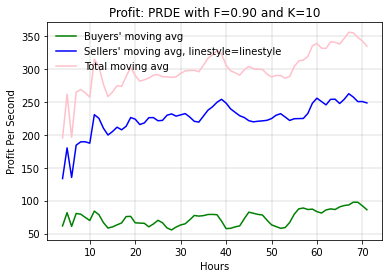

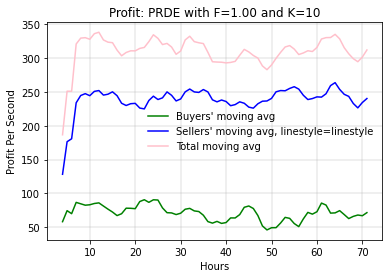

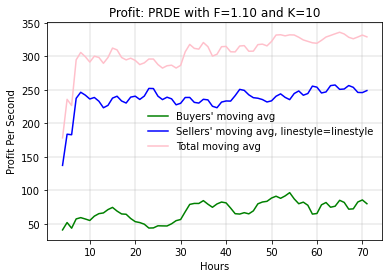

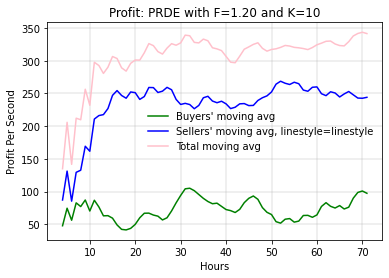

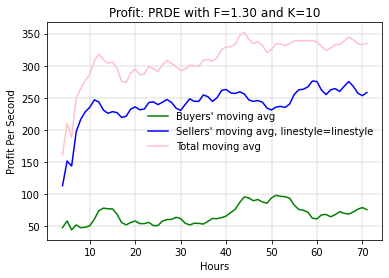

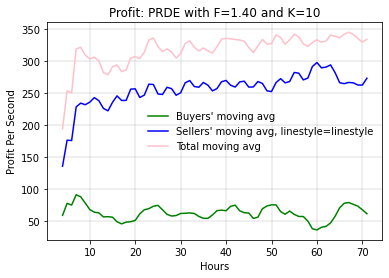

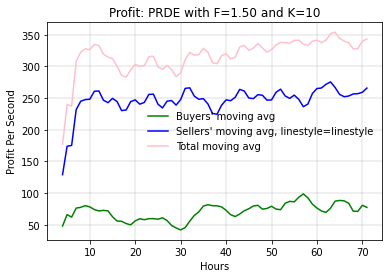

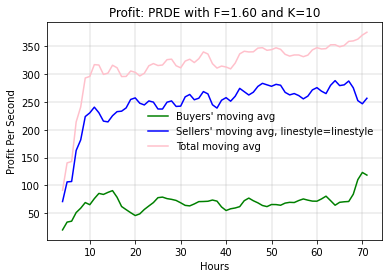

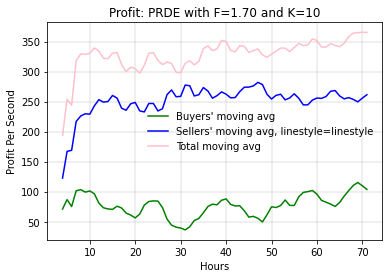

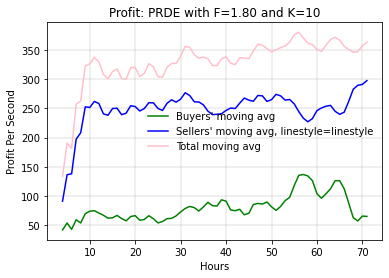

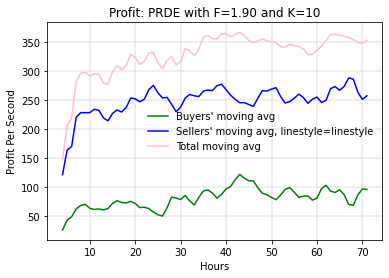

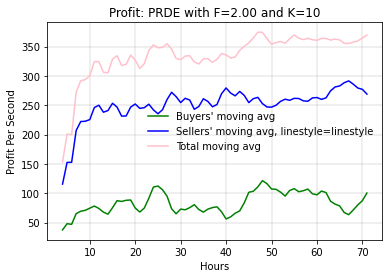

In [57]:
#Homog_Static graphs
def plot_sma_profit (filename, k_value, f_value):
    df = pd.read_csv(filename, header=None)
    buyer_sum = pd.DataFrame()
    seller_sum = pd.DataFrame()

    
    for row in range(0,len(df.index)):
        b_sum = 0
        s_sum = 0
        for col in range (8, 219 ,7):
            b_sum +=df.loc[row][col]
        buyer_sum.loc[len(buyer_sum.index), 0] = b_sum

        for col in range (225, 428,7):
            s_sum +=df.loc[row][col]
        seller_sum.loc[len(seller_sum.index), 0] = s_sum
      
   
   # calculate smooth moving average
    buyers_sma = buyer_sum.loc[:,0].rolling(5).mean()
    sellers_sma = seller_sum.loc[:,0].rolling(5).mean()
    total_sma =  buyers_sma + sellers_sma
    
    
    t_period = list(range(len(buyers_sma.index)))
    plt.plot(t_period, buyers_sma, color='green', label='Buyers\' moving avg')    
    plt.plot(t_period, sellers_sma, color='blue', label='Sellers\' moving avg'', linestyle=linestyle') 
    plt.plot(t_period, total_sma, color='pink', label='Total moving avg') 
    plt.xlabel("Hours")
    plt.ylabel("Profit Per Second")
    plt.title(f"Profit: PRDE with F={f_value:.2f} and K={k_value}")
    plt.legend(frameon=False)
    plt.grid(linewidth=0.4)
    plt.show()

    
    
for k in range(4, 11):
     for f in np.arange(0.0,2.1, 0.1):
        plot_sma_profit(f'Homog_Static/trial{k:02d}_{f:.2f}_strats.csv', k, f)

In [59]:
def calc_total_profit(filename, start):
    df = pd.read_csv(filename, header=None)

    b_sum = 0
    s_sum = 0
    for row in range(start,72):
       
        for col in range (8, 219 ,7):
            b_sum +=df.loc[row][col]
        for col in range (225, 428,7):
            s_sum +=df.loc[row][col]
   
                           
    return b_sum, s_sum
    
      
   
df = pd.DataFrame(columns = ['k', 'f', 'buyer_total', 'seller_total', 'trader_total', 'bt_15', 'st_15', 'total_15'])
for k in range(4, 11):
     for f in np.arange(0.0,2.1, 0.1):

            buyer, seller = calc_total_profit(f'Homog_Static/trial{k:02d}_{f:.2f}_strats.csv', 0)
            buyer_15, seller_15 = calc_total_profit(f'Homog_Static/trial{k:02d}_{f:.2f}_strats.csv', 15)
            
            df.loc[len(df.index)] = [k, f, buyer, seller, buyer+seller, buyer_15, seller_15, buyer_15+seller_15]
    

display(df)
df.to_csv('results.csv')

k    f  buyer_total  seller_total  trader_total        bt_15  \
0     4.0  0.0  5206.820907  15063.086758  20269.907665  4327.145011   
1     4.0  0.1  8427.285544  13804.061126  22231.346670  6855.101296   
2     4.0  0.2  8084.964725  14919.346005  23004.310730  7165.288046   
3     4.0  0.3  6664.318951  14992.913171  21657.232122  5728.983824   
4     4.0  0.4  6143.461961  14956.386122  21099.848083  5125.015160   
..    ...  ...          ...           ...           ...          ...   
142  10.0  1.6  5008.401019  17461.150651  22469.551670  4123.292078   
143  10.0  1.7  5533.631512  17733.402257  23267.033769  4326.207619   
144  10.0  1.8  5697.765726  17640.883471  23338.649197  4823.190514   
145  10.0  1.9  5699.677539  17475.220091  23174.897630  4907.732814   
146  10.0  2.0  5942.793163  17752.824857  23695.618020  5077.447057   

            st_15      total_15  
0    12658.921365  16986.066376  
1    11252.466705  18107.568001  
2    12398.795511  19564.083557  
3    12395.933268  18124.917092  
4    12387.219117  17512.234277  
..            ...           ...  
142  14915.762046  19039.054124  
143  14721.313353  19047.520972  
144  14731.920450  19555.110964  
145  14661.475641  19569.208455  
146  14854.987474  19932.434531  

[147 rows x 8 columns]

In [60]:
df.nlargest(5, 'buyer_total')

k    f  buyer_total  seller_total  trader_total        bt_15  \
1   4.0  0.1  8427.285544  13804.061126  22231.346670  6855.101296   
2   4.0  0.2  8084.964725  14919.346005  23004.310730  7165.288046   
7   4.0  0.7  7520.955672  15413.865254  22934.820926  6461.796105   
5   4.0  0.5  7332.390586  14348.823205  21681.213791  6293.198229   
47  6.0  0.5  7313.336352  14634.736806  21948.073158  5731.265662   

           st_15      total_15  
1   11252.466705  18107.568001  
2   12398.795511  19564.083557  
7   12622.833182  19084.629287  
5   11855.541955  18148.740184  
47  11790.059125  17521.324787

In [62]:
df.nlargest(5, 'seller_total')

k    f  buyer_total  seller_total  trader_total        bt_15  \
83  7.0  2.0  5607.742957  18823.731805  24431.474762  4751.890616   
40  5.0  1.9  4991.153612  18809.398748  23800.552360  4115.567300   
20  4.0  2.0  5551.341995  18707.043356  24258.385351  4676.142020   
79  7.0  1.6  5340.319732  18461.749616  23802.069348  3974.850993   
60  6.0  1.8  5691.058380  18410.319163  24101.377543  4793.115804   

           st_15      total_15  
83  15607.091375  20358.981991  
40  15988.964710  20104.532010  
20  15953.023835  20629.165855  
79  15399.204105  19374.055098  
60  15328.596618  20121.712422

In [67]:
df.nlargest(5, 'trader_total')

k    f  buyer_total  seller_total  trader_total        bt_15  \
41  5.0  2.0  6207.256664  18377.602779  24584.859443  5290.198778   
16  4.0  1.6  7195.889458  17347.200348  24543.089806  6134.462448   
82  7.0  1.9  6704.736607  17732.279744  24437.016351  5482.513302   
83  7.0  2.0  5607.742957  18823.731805  24431.474762  4751.890616   
20  4.0  2.0  5551.341995  18707.043356  24258.385351  4676.142020   

           st_15      total_15  
41  15292.862939  20583.061717  
16  14292.746850  20427.209298  
82  14681.474821  20163.988123  
83  15607.091375  20358.981991  
20  15953.023835  20629.165855

In [64]:
df.nlargest(5, 'bt_15')

k    f  buyer_total  seller_total  trader_total        bt_15  \
2   4.0  0.2  8084.964725  14919.346005  23004.310730  7165.288046   
1   4.0  0.1  8427.285544  13804.061126  22231.346670  6855.101296   
7   4.0  0.7  7520.955672  15413.865254  22934.820926  6461.796105   
46  6.0  0.4  7268.233185  14274.789043  21543.022228  6298.225381   
5   4.0  0.5  7332.390586  14348.823205  21681.213791  6293.198229   

           st_15      total_15  
2   12398.795511  19564.083557  
1   11252.466705  18107.568001  
7   12622.833182  19084.629287  
46  11767.416307  18065.641688  
5   11855.541955  18148.740184

In [65]:
df.nlargest(5, 'st_15')

k    f  buyer_total  seller_total  trader_total        bt_15  \
40  5.0  1.9  4991.153612  18809.398748  23800.552360  4115.567300   
20  4.0  2.0  5551.341995  18707.043356  24258.385351  4676.142020   
62  6.0  2.0  4889.298288  18305.644415  23194.942703  4307.255799   
17  4.0  1.7  5857.083506  18396.547928  24253.631434  4666.827269   
83  7.0  2.0  5607.742957  18823.731805  24431.474762  4751.890616   

           st_15      total_15  
40  15988.964710  20104.532010  
20  15953.023835  20629.165855  
62  15850.821150  20158.076949  
17  15608.409555  20275.236824  
83  15607.091375  20358.981991

In [68]:
df.nlargest(5, 'total_15')

k    f  buyer_total  seller_total  trader_total        bt_15  \
20  4.0  2.0  5551.341995  18707.043356  24258.385351  4676.142020   
41  5.0  2.0  6207.256664  18377.602779  24584.859443  5290.198778   
16  4.0  1.6  7195.889458  17347.200348  24543.089806  6134.462448   
83  7.0  2.0  5607.742957  18823.731805  24431.474762  4751.890616   
39  5.0  1.8  6811.601971  17156.237828  23967.839799  6090.695073   

           st_15      total_15  
20  15953.023835  20629.165855  
41  15292.862939  20583.061717  
16  14292.746850  20427.209298  
83  15607.091375  20358.981991  
39  14253.270851  20343.965924